In [1]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,1.0,2.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,1.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0


Will start with LR model including all columns except target. 

In [4]:
y = df['price']
X = df.drop('price', axis = 1)

In [5]:
multi_baseline = sm.OLS(y, sm.add_constant(X)).fit()
multi_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2707.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:09:47   Log-Likelihood:            -2.9550e+05
No. Observations:               21597   AIC:                         5.910e+05
Df Residuals:                   21580   BIC:                         5.912e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.515e+06   3.07e+06     -1.146      0.252   -9.53e+06     2.5e+06
bedrooms          -4.473e+04   1991.177    -22.462      0.000   -4.86e+04   -4.08e+04
bathrooms          4.364e+04   3434.785     12.706      0.000    3.69e+04    5.04e+04
sqft_living         120.7104      2.385     50.614      0.000     116.036     125.385
sqft_lot              0.1525      0.050      3.024      0.002       0.054       0.251
floors             1.079e+04   3790.194      2.846      0.004    3356.293    1.82e+04
sqft_above           65.2782      2.359     27.676      0.000      60.655      69.901
yr_built          -2862.2112     75.442    -37.939      0.000   -3010.083   -2714.340
yr_renovated         33.4956      4.183      8.007      0.000      25.296      41.695
zipcode            -494.3420     34.598    -14.288      0.000    -562.157    -426.527
lat                5.587e+05   1.13e+04     49.665      0.000    5.37e+05    5.81e+05
long              -2.507e+05   1.38e+04    -18.123      0.000   -2.78e+05   -2.24e+05
sqft_living15        38.2225      3.586     10.658      0.000      31.193      45.252
sqft_lot15           -0.3293      0.077     -4.264      0.000      -0.481      -0.178
sqft_basment_calc    55.4260      2.746     20.183      0.000      50.043      60.809
grades             1.023e+05   2267.364     45.105      0.000    9.78e+04    1.07e+05
waterfront         7.853e+04   4146.831     18.938      0.000    7.04e+04    8.67e+04
condition          2.877e+04   2470.161     11.646      0.000    2.39e+04    3.36e+04
==============================================================================
Omnibus:                    18974.402   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1799561.443
Skew:                           3.795   Prob(JB):                         0.00
Kurtosis:                      47.070   Cond. No.                     2.67e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Initial interpretations: 
- R2 value increased as expected. It increased from 49% in SLR baseline to 67%. 
- p-values are < 0.05 for all variables. 
- will need to examine issues of multicollinearity as Cond. No. is very large. 

## Exploring multicollinearity 

Found correlations for pairs of features that are higher than 0.75. 

In [6]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [7]:
#code from multicollinearity lab

df_multico = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_multico['pairs'] = list(zip(df_multico.level_0, df_multico.level_1))
df_multico.set_index(['pairs'], inplace = True)
df_multico.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_multico.columns = ['cc']
df_multico.drop_duplicates(inplace=True)
df_multico[(df_multico.cc>.75) & (df_multico.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(grades, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grades, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758


Even though sq ft living is the highest correlated to price, it is highly correlated with several other variables. Will start by dropping sqft_above as it provides similar information as sqft_living and is less correlated with sale price.

In [8]:
X_dropped = df.drop(columns=['price', 'sqft_above'], axis = 1)

In [9]:
results_dropped = sm.OLS(y, sm.add_constant(X_dropped)).fit()
results_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2707.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:09:47   Log-Likelihood:            -2.9550e+05
No. Observations:               21597   AIC:                         5.910e+05
Df Residuals:                   21580   BIC:                         5.912e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.515e+06   3.07e+06     -1.146      0.252   -9.53e+06     2.5e+06
bedrooms          -4.473e+04   1991.177    -22.462      0.000   -4.86e+04   -4.08e+04
bathrooms          4.364e+04   3434.785     12.706      0.000    3.69e+04    5.04e+04
sqft_living         185.9887      3.869     48.077      0.000     178.406     193.571
sqft_lot              0.1525      0.050      3.024      0.002       0.054       0.251
floors             1.079e+04   3790.194      2.846      0.004    3356.293    1.82e+04
yr_built          -2862.2112     75.442    -37.939      0.000   -3010.083   -2714.340
yr_renovated         33.4956      4.183      8.007      0.000      25.296      41.695
zipcode            -494.3420     34.598    -14.288      0.000    -562.157    -426.527
lat                5.587e+05   1.13e+04     49.665      0.000    5.37e+05    5.81e+05
long              -2.507e+05   1.38e+04    -18.123      0.000   -2.78e+05   -2.24e+05
sqft_living15        38.2225      3.586     10.658      0.000      31.193      45.252
sqft_lot15           -0.3293      0.077     -4.264      0.000      -0.481      -0.178
sqft_basment_calc    -9.8522      4.530     -2.175      0.030     -18.731      -0.973
grades             1.023e+05   2267.364     45.105      0.000    9.78e+04    1.07e+05
waterfront         7.853e+04   4146.831     18.938      0.000    7.04e+04    8.67e+04
condition          2.877e+04   2470.161     11.646      0.000    2.39e+04    3.36e+04
==============================================================================
Omnibus:                    18974.402   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1799561.443
Skew:                           3.795   Prob(JB):                         0.00
Kurtosis:                      47.070   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Reran model without sqft_above: 

- R2 value did not change and all coefficients are sigificant. 
- Cond. No dropped from 2.7 x 10^16 to 2.1 x 10^8. To determine if more features need to be dropped a VIF test will be conducted.

In [10]:
# code by Aniruddha Bhandari
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [11]:
calc_vif(X_dropped)

,variables,VIF
0,bedrooms,2.321412e+01
1,bathrooms,2.874532e+01
2,sqft_living,3.710469e+01
3,sqft_lot,2.372765e+00
4,floors,1.688569e+01
5,yr_built,9.230190e+03
6,yr_renovated,1.151178e+00
7,zipcode,1.634973e+06
8,lat,1.376308e+05
9,long,1.359686e+06


There are several very high scores, will start by dropping the highest "zipcode".

In [12]:
X_dropped_vif = df.drop(columns=['price', 'sqft_above', 'zipcode'], axis = 1)

In [13]:
results_dropped_vif = sm.OLS(y, sm.add_constant(X_dropped_vif)).fit()
results_dropped_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2847.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:09:49   Log-Likelihood:            -2.9560e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21581   BIC:                         5.914e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.032e+07   1.68e+06    -24.067      0.000   -4.36e+07    -3.7e+07
bedrooms          -4.312e+04   1997.334    -21.588      0.000    -4.7e+04   -3.92e+04
bathrooms          4.451e+04   3450.372     12.901      0.000    3.77e+04    5.13e+04
sqft_living         184.5464      3.885     47.498      0.000     176.931     192.162
sqft_lot              0.1494      0.051      2.948      0.003       0.050       0.249
floors             5595.9559   3790.467      1.476      0.140   -1833.640     1.3e+04
yr_built          -2716.9115     75.104    -36.175      0.000   -2864.121   -2569.702
yr_renovated         34.4626      4.202      8.201      0.000      26.226      42.699
lat                5.245e+05    1.1e+04     47.493      0.000    5.03e+05    5.46e+05
long              -1.659e+05   1.26e+04    -13.217      0.000   -1.91e+05   -1.41e+05
sqft_living15        42.3364      3.591     11.788      0.000      35.297      49.376
sqft_lot15           -0.3394      0.078     -4.375      0.000      -0.491      -0.187
sqft_basment_calc   -12.3225      4.548     -2.710      0.007     -21.237      -3.408
grades             1.032e+05   2277.106     45.313      0.000    9.87e+04    1.08e+05
waterfront         7.727e+04   4165.366     18.552      0.000    6.91e+04    8.54e+04
condition          3.263e+04   2466.827     13.229      0.000    2.78e+04    3.75e+04
==============================================================================
Omnibus:                    19098.414   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1822838.122
Skew:                           3.835   Prob(JB):                         0.00
Kurtosis:                      47.349   Cond. No.                     5.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R2 value decreased by .003.
- Number of floors is no longer significant, remove for next iteration.
- Cond. No. decreased to 5.9 x 10^7.

In [14]:
X_dropped_floors = df.drop(columns=['price', 'sqft_above', 'zipcode', 'floors'], axis = 1)

In [15]:
results_dropped_floors = sm.OLS(y, sm.add_constant(X_dropped_floors)).fit()
results_dropped_floors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     3050.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:09:49   Log-Likelihood:            -2.9561e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21582   BIC:                         5.914e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.076e+07   1.65e+06    -24.725      0.000    -4.4e+07   -3.75e+07
bedrooms          -4.321e+04   1996.375    -21.646      0.000   -4.71e+04   -3.93e+04
bathrooms          4.586e+04   3326.844     13.786      0.000    3.93e+04    5.24e+04
sqft_living         185.4649      3.835     48.357      0.000     177.947     192.982
sqft_lot              0.1478      0.051      2.917      0.004       0.048       0.247
yr_built          -2694.5005     73.556    -36.632      0.000   -2838.676   -2550.325
yr_renovated         34.7322      4.198      8.273      0.000      26.503      42.961
lat                5.261e+05    1.1e+04     47.898      0.000    5.05e+05    5.48e+05
long              -1.686e+05   1.24e+04    -13.565      0.000   -1.93e+05   -1.44e+05
sqft_living15        41.7098      3.566     11.696      0.000      34.720      48.700
sqft_lot15           -0.3432      0.078     -4.426      0.000      -0.495      -0.191
sqft_basment_calc   -15.3011      4.076     -3.754      0.000     -23.290      -7.312
grades             1.035e+05   2267.841     45.632      0.000     9.9e+04    1.08e+05
waterfront         7.732e+04   4165.361     18.563      0.000    6.92e+04    8.55e+04
condition          3.238e+04   2460.885     13.158      0.000    2.76e+04    3.72e+04
==============================================================================
Omnibus:                    19058.269   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1807697.076
Skew:                           3.824   Prob(JB):                         0.00
Kurtosis:                      47.163   Cond. No.                     5.75e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R2 value stayed the same.
- All coefficients are still significant. 
- Cond. No is down to 5.8 x 10^7.

## Feature Transformation Exploration

In order to determine if we can combine features or better explain the relationship between price and selected features we examined the scatter plots of key features vs price to see if applying a log transformation would be beneficial. 

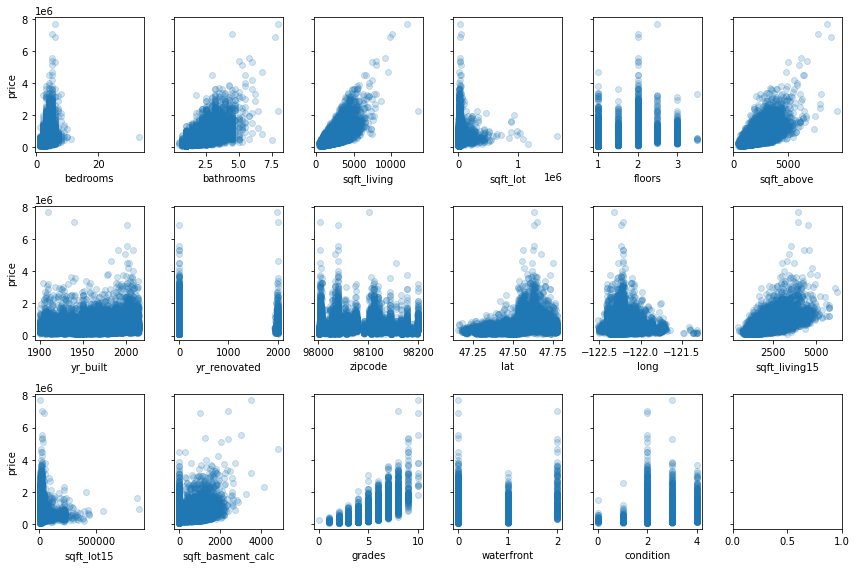

In [16]:
y_plots = df["price"]
x_plots = df.drop("price", axis=1)

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(12,8), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("price")

fig.tight_layout()

Based on scatterplots we are looking at features to transform

Potential features: 
- sqft_livin
- sqft_lot
- bathrooms
- bedrooms 
- year built

Compared the mean price for each build grade, noticed that the relationship looked exponetial. Decided to log transform the feature to see if the relationship was linear, upon initial inspection it appears that the transformed feature does have a linear relationship with price.

In [17]:
mean_grade = df.groupby('grades')['price'].mean()

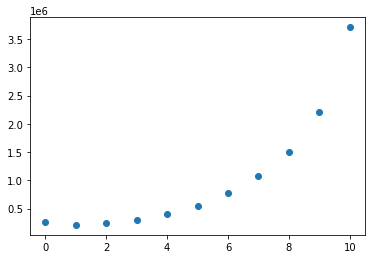

In [18]:
fig, ax = plt.subplots()

ax.scatter(x = mean_grade.index, y = mean_grade)

In [19]:
mean_price_log = np.log(mean_grade)


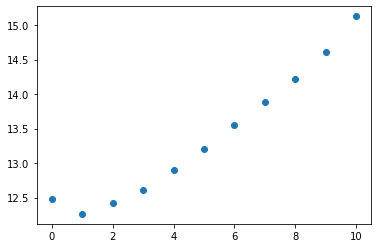

In [20]:
fig, ax = plt.subplots()

ax.scatter(x = mean_grade.index, y = mean_price_log)

We then explored the histograms of key features. 

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

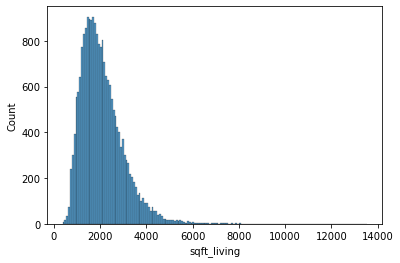

In [21]:
sns.histplot(df['sqft_living'])

In [22]:
y_log = np.log(df['price'])
x_log_sqftliving = np.log(df['sqft_living'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

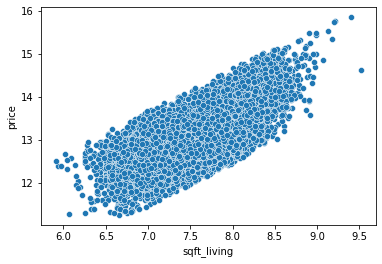

In [23]:
sns.scatterplot(x = x_log_sqftliving, y = y_log)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

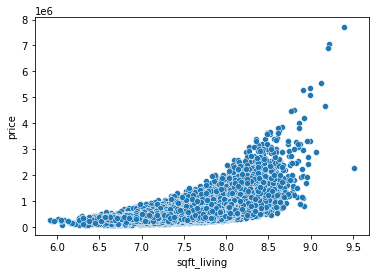

In [24]:
sns.scatterplot(x = x_log_sqftliving, y = y)

It appears that there is a more linear relationship present when both x and y are log transfomred. 

In [25]:
# x_log_sqftlot = np.log(df['sqft_lot'])
# sns.scatterplot(x = x_log_sqftlot, y = y_log)
# # not helpful

In [26]:
# x_log_year = np.log(df['yr_built'])
# sns.scatterplot(x = x_log_year, y = y_log)
# #not helpful

/Users/ashlidougherty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='grades', ylabel='price'>

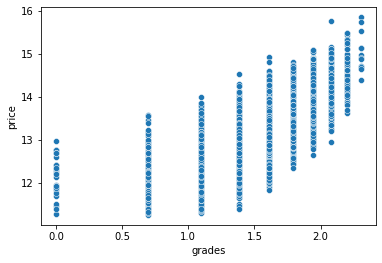

In [27]:
x_log_grades = np.log(df['grades'])
sns.scatterplot(x = x_log_grades, y = y_log)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

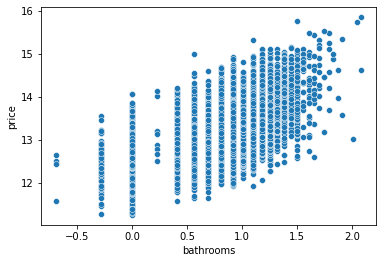

In [28]:
x_log_bathroom = np.log(df['bathrooms'])
sns.scatterplot(x = x_log_bathroom, y = y_log)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

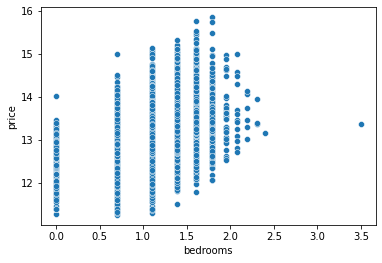

In [29]:
x_log_bedroom = np.log(df['bedrooms'])
sns.scatterplot(x = x_log_bedroom, y = y_log)

### Feature transfrom conclusions
***
Taking the log of identified features did not appear to increase the performance of the model. These transformed features will not be included in the final model.

***

## Exploration of interactions

Due to a high correlation we decided to try an interaction between grades and sqft_living. 

We multiplied grades by sqft_living and ran the regression model again with the product column included and the individual grades and sqft_living columns excluded. 

In [30]:
df['grades*sqftliving'] = df['grades'] * df['sqft_living']
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition,grades*sqftliving
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,1.0,2.0,4720.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0,10280.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,1.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0,2310.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0,7840.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0,8400.0


In [31]:
X_interactions = df.drop(columns=['price', 'sqft_above', 'zipcode',
                                  'floors', 'grades', 'sqft_living'], axis = 1)
interactions_results = sm.OLS(y, sm.add_constant(X_interactions)).fit()
interactions_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3913.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:09:51   Log-Likelihood:            -2.9431e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21583   BIC:                         5.888e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.495e+07   1.51e+06    -29.727      0.000   -4.79e+07    -4.2e+07
bedrooms          -3.161e+04   1794.627    -17.613      0.000   -3.51e+04   -2.81e+04
bathrooms          4.126e+04   3034.669     13.596      0.000    3.53e+04    4.72e+04
sqft_lot              0.0887      0.048      1.859      0.063      -0.005       0.182
yr_built          -2024.0146     67.091    -30.168      0.000   -2155.517   -1892.512
yr_renovated         46.4507      3.950     11.760      0.000      38.709      54.193
lat                5.582e+05   1.02e+04     54.627      0.000    5.38e+05    5.78e+05
long              -1.833e+05   1.15e+04    -15.897      0.000   -2.06e+05   -1.61e+05
sqft_living15        35.5182      3.218     11.038      0.000      29.211      41.825
sqft_lot15           -0.4014      0.073     -5.501      0.000      -0.544      -0.258
sqft_basment_calc   -18.1554      3.592     -5.055      0.000     -25.195     -11.116
waterfront         7.361e+04   3923.641     18.759      0.000    6.59e+04    8.13e+04
condition           3.93e+04   2318.168     16.955      0.000    3.48e+04    4.38e+04
grades*sqftliving    36.8449      0.347    106.109      0.000      36.164      37.526
==============================================================================
Omnibus:                    13705.236   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           556536.895
Skew:                           2.473   Prob(JB):                         0.00
Kurtosis:                      27.372   Cond. No.                     5.64e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Our R2 value increased to .702. 
- sqft_lot is no longer significant rerun model without it
- Still has a high cond no at 5.6 x 10^7

### Final sm model with interaction

In [32]:
X_drop_lot = df.drop(columns=['price', 'sqft_above', 'zipcode',
                                  'floors', 'grades', 'sqft_living', 'sqft_lot'], axis = 1)

In [33]:
drop_lot_results = sm.OLS(y, sm.add_constant(X_drop_lot)).fit()
drop_lot_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     4239.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:09:51   Log-Likelihood:            -2.9431e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21584   BIC:                         5.888e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -4.47e+07   1.51e+06    -29.679      0.000   -4.77e+07   -4.17e+07
bedrooms          -3.167e+04   1794.437    -17.648      0.000   -3.52e+04   -2.82e+04
bathrooms          4.131e+04   3034.705     13.613      0.000    3.54e+04    4.73e+04
yr_built          -2030.3672     67.007    -30.301      0.000   -2161.706   -1899.028
yr_renovated         46.3746      3.950     11.741      0.000      38.633      54.117
lat                5.574e+05   1.02e+04     54.594      0.000    5.37e+05    5.77e+05
long              -1.816e+05   1.15e+04    -15.799      0.000   -2.04e+05   -1.59e+05
sqft_living15        35.1762      3.213     10.949      0.000      28.879      41.473
sqft_lot15           -0.3077      0.053     -5.834      0.000      -0.411      -0.204
sqft_basment_calc   -18.2299      3.591     -5.076      0.000     -25.269     -11.190
waterfront         7.364e+04   3923.826     18.767      0.000    6.59e+04    8.13e+04
condition          3.924e+04   2318.007     16.926      0.000    3.47e+04    4.38e+04
grades*sqftliving    36.8941      0.346    106.554      0.000      36.215      37.573
==============================================================================
Omnibus:                    13691.092   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           553633.722
Skew:                           2.470   Prob(JB):                         0.00
Kurtosis:                      27.307   Cond. No.                     3.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R2 value stayed at .702
- all coefficients are still statistically significant.
- Cond. No. dropped to 3.4 x 10^7 (one of the lower numbers produced)

Next we calculated the mean absolute error and root means squared error. 

In [34]:
drop_lot_results.resid

0       -113509.585607
1       -213616.651847
2       -239056.731214
3        103632.264232
4        100137.139034
             ...      
21592    -91176.518905
21593    -59815.657355
21594    208369.455145
21595     -1556.731055
21596    129205.334423
Length: 21597, dtype: float64

<AxesSubplot:ylabel='Count'>

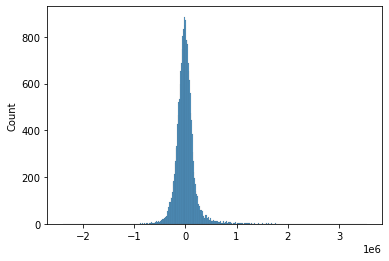

In [35]:
sns.histplot(drop_lot_results.resid)

In [36]:
mae = drop_lot_results.resid.abs().sum() / len(y)
mae

126499.74513076927

In [37]:
rmse = ((drop_lot_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

200512.56866946522

We examined our errors by creating a QQ plot.

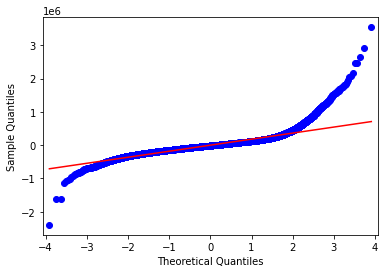

In [38]:
sm.qqplot(drop_lot_results.resid, line="r");

Based on the histrogram this QQ plot looks like expected. The high end outliers account for some of the errors. 

### final sm model without interaction

In [39]:
X_grade_living = df.drop(columns=['price', 'sqft_above', 'zipcode',
                                  'floors', 'sqft_lot', 'grades*sqftliving'], axis = 1)
X_grade_living_results = sm.OLS(y, sm.add_constant(X_grade_living)).fit()
X_grade_living_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     3283.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:09:52   Log-Likelihood:            -2.9561e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21583   BIC:                         5.914e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.034e+07   1.64e+06    -24.560      0.000   -4.36e+07   -3.71e+07
bedrooms          -4.338e+04   1995.908    -21.734      0.000   -4.73e+04   -3.95e+04
bathrooms           4.59e+04   3327.403     13.793      0.000    3.94e+04    5.24e+04
sqft_living         186.1248      3.829     48.605      0.000     178.619     193.631
yr_built          -2705.7068     73.469    -36.828      0.000   -2849.711   -2561.703
yr_renovated         34.5811      4.199      8.236      0.000      26.351      42.811
lat                5.249e+05    1.1e+04     47.812      0.000    5.03e+05    5.46e+05
long              -1.658e+05   1.24e+04    -13.380      0.000    -1.9e+05   -1.42e+05
sqft_living15        41.0916      3.561     11.541      0.000      34.113      48.071
sqft_lot15           -0.1872      0.056     -3.333      0.001      -0.297      -0.077
sqft_basment_calc   -15.5242      4.076     -3.809      0.000     -23.513      -7.535
grades             1.036e+05   2267.750     45.695      0.000    9.92e+04    1.08e+05
waterfront         7.738e+04   4166.038     18.574      0.000    6.92e+04    8.55e+04
condition          3.226e+04   2460.950     13.108      0.000    2.74e+04    3.71e+04
==============================================================================
Omnibus:                    19032.862   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1795258.337
Skew:                           3.817   Prob(JB):                         0.00
Kurtosis:                      47.008   Cond. No.                     3.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R2 value is .664 (which is lower than the LR model with the interaction)
- pvalues for all coefficients are significant. 
- condition number is the same though at 3.4 x 10^7

Next we calculated the mean absolute error and root means squared error. 

<AxesSubplot:ylabel='Count'>

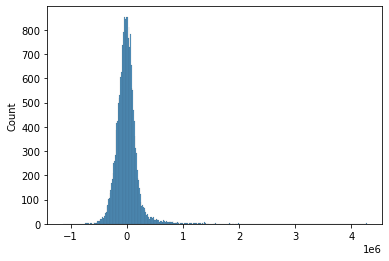

In [40]:
sns.histplot(X_grade_living_results.resid)

In [41]:
X_grade_living_results.resid

0       -103891.522170
1       -234372.228441
2       -162683.805589
3        110131.938317
4         66760.861897
             ...      
21592   -101988.130137
21593    -65179.736369
21594    259503.000435
21595    -28598.655172
21596    179732.106420
Length: 21597, dtype: float64

In [42]:
mae2 = X_grade_living_results.resid.abs().sum() / len(y)
mae2

133350.32373272383

In [43]:
rmse2 = ((X_grade_living_results.resid ** 2).sum() / len(y)) ** 0.5
rmse2

212905.82813611644

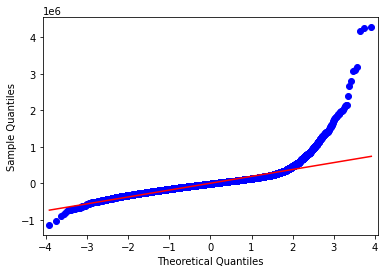

In [44]:
sm.qqplot(X_grade_living_results.resid, line="r");

Based on the histrogram this QQ plot looks like expected. The high end outliers account for some of the errors. 
***
Source for qqplot interpretation: 
https://math.illinois.edu/system/files/inline-files/Proj9AY1516-report2.pdf

## Additional Models

### Using dummy columns

In [45]:
X_interaction_test = df.loc[:, ['sqft_living','grades']]
X_interaction_test
X_interaction_test1 = pd.get_dummies(X_interaction_test, columns=['grades'], drop_first=True)
X_interaction_test1


,sqft_living,grades_1.0,grades_2.0,grades_3.0,grades_4.0,grades_5.0,grades_6.0,grades_7.0,grades_8.0,grades_9.0,grades_10.0
0,1180,0,0,0,1,0,0,0,0,0,0
1,2570,0,0,0,1,0,0,0,0,0,0
2,770,0,0,1,0,0,0,0,0,0,0
3,1960,0,0,0,1,0,0,0,0,0,0
4,1680,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,0,0,0,0,1,0,0,0,0,0
21593,2310,0,0,0,0,1,0,0,0,0,0
21594,1020,0,0,0,1,0,0,0,0,0,0
21595,1600,0,0,0,0,1,0,0,0,0,0


In [46]:
X_interaction2 = X_interaction_test1.copy()
X_interaction2["sqft_living x grades"] = X_interaction_test1["sqft_living"] * X_interaction_test1["grades_1.0"]
X_interaction2


,sqft_living,grades_1.0,grades_2.0,grades_3.0,grades_4.0,grades_5.0,grades_6.0,grades_7.0,grades_8.0,grades_9.0,grades_10.0,sqft_living x grades
0,1180,0,0,0,1,0,0,0,0,0,0,0
1,2570,0,0,0,1,0,0,0,0,0,0,0
2,770,0,0,1,0,0,0,0,0,0,0,0
3,1960,0,0,0,1,0,0,0,0,0,0,0
4,1680,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,0,0,0,0,1,0,0,0,0,0,0
21593,2310,0,0,0,0,1,0,0,0,0,0,0
21594,1020,0,0,0,1,0,0,0,0,0,0,0
21595,1600,0,0,0,0,1,0,0,0,0,0,0


In [47]:
interaction_model = sm.OLS(y, sm.add_constant(X_interaction2)).fit()
interaction_results = interaction_model.summary()
interaction_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2503.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:09:52   Log-Likelihood:            -2.9798e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21584   BIC:                         5.961e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.802e+05   2.38e+05      0.758      0.448   -2.86e+05    6.46e+05
sqft_living            157.2816      2.783     56.508      0.000     151.826     162.737
grades_1.0            4.996e+04    2.8e+05      0.178      0.858   -4.99e+05    5.99e+05
grades_2.0           -8.635e+04   2.38e+05     -0.363      0.717   -5.53e+05     3.8e+05
grades_3.0           -6.571e+04   2.38e+05     -0.276      0.782   -5.32e+05       4e+05
grades_4.0           -4.335e+04   2.38e+05     -0.182      0.855   -5.09e+05    4.22e+05
grades_5.0            1.914e+04   2.38e+05      0.081      0.936   -4.47e+05    4.85e+05
grades_6.0            1.424e+05   2.38e+05      0.599      0.549   -3.24e+05    6.08e+05
grades_7.0            3.385e+05   2.38e+05      1.423      0.155   -1.28e+05    8.05e+05
grades_8.0            6.263e+05   2.38e+05      2.629      0.009    1.59e+05    1.09e+06
grades_9.0            1.161e+06   2.39e+05      4.849      0.000    6.91e+05    1.63e+06
grades_10.0           2.354e+06   2.47e+05      9.515      0.000    1.87e+06    2.84e+06
sqft_living x grades  -183.9788    207.398     -0.887      0.375    -590.494     222.536
==============================================================================
Omnibus:                    13860.248   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473164.646
Skew:                           2.575   Prob(JB):                         0.00
Kurtosis:                      25.345   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***

### Map of house location and price

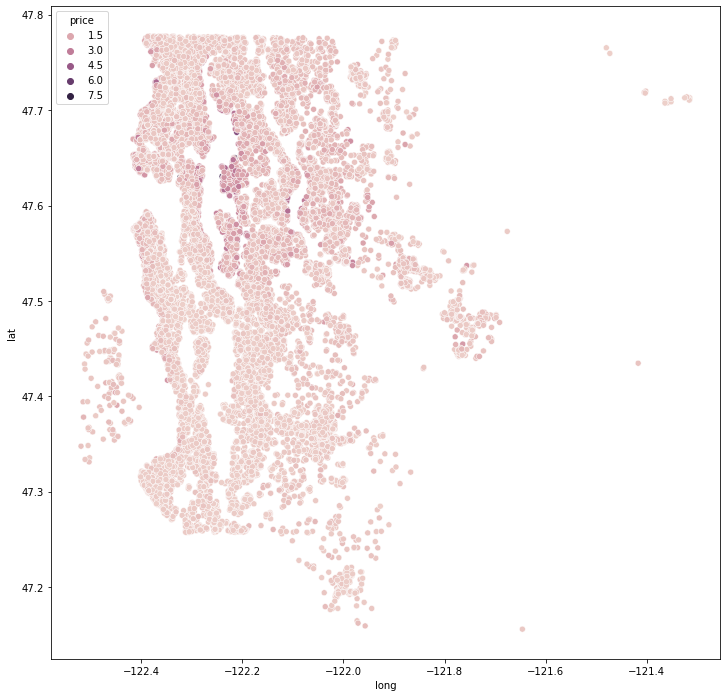

In [48]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=df,
               hue='price');